In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

## Loading the data

In [0]:
data_dirpath = '/content/drive/My Drive/case_study_2/random_split/'

print("Avaliable dataset partitions in this are {}".format(os.listdir(data_dirpath)))

Avaliable dataset partitions in this are ['dev', 'train', 'test', 'F5.large.jpg']


In [0]:
import pandas as pd

def reading_partition(partition='dev',data_dir=data_dirpath):
    all_partition=[]
    for file in os.listdir(os.path.join(data_dir,partition)):
        with open(os.path.join(data_dir,partition,file)) as f:
            all_partition.append(pd.read_csv(f , index_col=None))
    return pd.concat(all_partition)

In [0]:
dftest = reading_partition('test')

In [0]:
# dftrain = reading_partition('train')

In [0]:
dfdev = reading_partition('dev')

In [0]:
print("Size of dataset train is {} , test is {}, dev is {}".format(len(dftrain),len(dftest),len(dfdev)))

Size of dataset train is 1086741 , test is 126171, dev is 126171


In [0]:
classes = np.intersect1d( np.intersect1d(dftrain.family_accession,dfdev.family_accession) ,dftest.family_accession)
number_of_unique_classes = len (classes)
number_of_unique_classes

13071

In [0]:
def class_joint(data):
  classs = []
  for clas in data['family_accession']:
      x = clas.split('.')
      y = x[0] + str(x[1])
      classs.append(y)
  data['class']=classs
  return data

In [0]:
dftrain = class_joint(dftrain)

In [0]:
dftest =class_joint(dftest)

In [0]:
dfdev = class_joint(dfdev)

In [0]:
import pandas as pd

In [0]:
train.shape,test.shape,dev.shape

((100000, 7), (10000, 6), (10000, 6))

In [0]:
import numpy as np
classes = np.intersect1d( np.intersect1d(dftrain.family_accession,dfdev.family_accession) ,dftest.family_accession)
number_of_unique_classes = len (classes)
number_of_unique_classes

13071

In [0]:
train = dftrain.loc[dftrain.family_accession.isin(classes)].reset_index()
dev = dfdev.loc[dfdev.family_accession.isin(classes)].reset_index()
test = dftest.loc[dftest.family_accession.isin(classes)].reset_index()

In [0]:
print("train: ",train.shape,"dev:",dev.shape,"test:",test.shape)

train:  (1064950, 7) dev: (126171, 7) test: (126171, 7)


In [0]:
train.head()

,index,family_id,sequence_name,family_accession,aligned_sequence,sequence,alignment_length,class
0,2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE,55,PF130057
1,3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,121,PF0226116
2,5,DUF4131,Q6N5R7_RHOPA/70-226,PF13567.6,DHEPVAWVAAATAAGFVIAA...VLLR......................,DHEPVAWVAAATAAGFVIAAVLLRRSRAFAPVLLLTALLAGFATAS...,281,PF135676
3,6,GGACT,A0A086WQ80_9VIBR/5-113,PF06094.12,LFVY...GTLRQG..ESNH.N.F.L.AD.....S...Q...........,LFVYGTLRQGESNHNFLADSQCLGHFETPPHYALYDLGTYPAVIEG...,298,PF0609412
4,8,His_kinase,Q47E94_DECAR/372-450,PF06580.13,SE.I..KLLHAQVNPHFLFNALNTL......S....AV...I.......,SEIKLLHAQVNPHFLFNALNTLSAVIRRDPEKACHLVLNLSTFFRK...,163,PF0658013


In [0]:
family_class_cnt = train.groupby('family_accession').size().sort_values(ascending = False)

In [0]:
family_class_cnt.head(20)

family_accession
PF13649.6     331
PF00560.33    188
PF13508.7     163
PF00677.17    147
PF06580.13    138
PF00400.32    134
PF02397.16    134
PF01035.20    125
PF02885.17    120
PF03484.15    111
PF01368.20    111
PF02881.19    110
PF01725.16    107
PF02417.15    104
PF01255.19    103
PF03453.17    103
PF05192.18    101
PF02545.14    100
PF00126.27     99
PF01523.16     98
dtype: int64

In [0]:
# Let c the family with most sequences
train.groupby('family_id').size().sort_values(ascending=False).head(10)

family_id
Methyltransf_25    331
LRR_1              188
Acetyltransf_7     163
Lum_binding        147
His_kinase         138
WD40               134
Bac_transf         134
DNA_binding_1      125
Glycos_trans_3N    120
B5                 111
dtype: int64

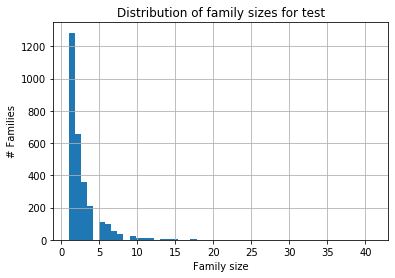

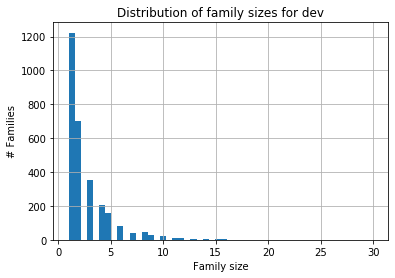

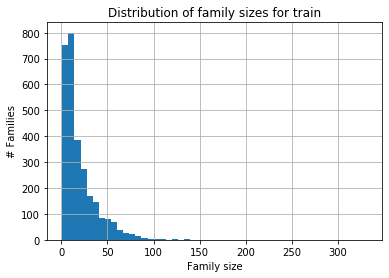

In [0]:
import matplotlib.pyplot as plt
partitions = {'test': test, 'dev': dev, 'train': train}

for name, partition in partitions.items():
    partition.groupby('family_id').size().hist(bins=50)
    plt.title('Distribution of family sizes for %s' % name)
    plt.ylabel('# Families')
    plt.xlabel('Family size')
    plt.show()

## Families with longest alignment length

Text(0, 0.5, 'No of sequence')

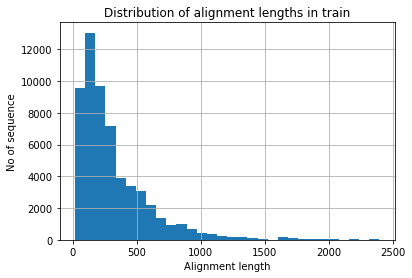

In [0]:
train['alignment_length'] = train.aligned_sequence.str.len()
train.alignment_length.hist(bins=30)
plt.title("Distribution of alignment lengths in train")
plt.xlabel("Alignment length")
plt.ylabel("No of sequence")


In [0]:
family_lengths = (train[['family_id', 'alignment_length']]
                  .drop_duplicates()
                  .sort_values(by='alignment_length', ascending=False))

family_lengths.head(5)

,family_id,alignment_length
2555,CobN-Mg_chel,2394
15,PHO4,2197
154,Vps35,2026
772,Sec1,1998
966,Cullin,1975


In [0]:
family_lengths.tail(5)

,family_id,alignment_length
9318,LPAM_1,21
1622,zf_CCCH_4,21
1407,SEC-C,20
2824,UIM,17
294,NPR,17


In [0]:
test.head()

,index,family_id,sequence_name,family_accession,aligned_sequence,sequence,class
0,0,Ribosomal_L28,G2PE79_STRVO/4-62,PF00830.19,.HCQLTG.RQPGFGHH.....I....S.HS...............H...,HCQLTGRQPGFGHHISHSHRRTKRRFDPNIQHKRYWLPSEGRHIRL...,PF0083019
1,2,UPF0052,B8HTP5_CYAP4/137-423,PF01933.18,IVAIGGGTGLSTLL..............RGLKEYS..............,IVAIGGGTGLSTLLRGLKEYSANITAIVTVADDGGSSGRLRREIGV...,PF0193318
2,3,SBD_N,Q12HD1_POLSJ/12-248,PF07005.11,LAYYGDDFTGSTDVMEAFSA.....AGV........PTVLF.LRP....,LAYYGDDFTGSTDVMEAFSAAGVPTVLFLRPPTADWLKRFPEVRCV...,PF0700511
3,4,LepA_C,D7G0L8_ECTSI/605-711,PF06421.12,INGEDAPPLSTVCHRDQAHQRGKVLTEKLKQLIPRQMFRVPIQACI...,INGEDAPPLSTVCHRDQAHQRGKVLTEKLKQLIPRQMFRVPIQACI...,PF0642112
4,5,ChW,R7GIS4_9CLOT/734-768,PF07538.11,HVQDVG........W.........Q.......N.....W..L.NGG...,HVQDVGWQNWLNGGKTAGTTGKSKRLEAIQIKLNG,PF0753811


In [0]:
train.head()

,index,family_id,sequence_name,family_accession,aligned_sequence,sequence,alignment_length,class
0,2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE,55,PF130057
1,3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,121,PF0226116
2,5,DUF4131,Q6N5R7_RHOPA/70-226,PF13567.6,DHEPVAWVAAATAAGFVIAA...VLLR......................,DHEPVAWVAAATAAGFVIAAVLLRRSRAFAPVLLLTALLAGFATAS...,281,PF135676
3,6,GGACT,A0A086WQ80_9VIBR/5-113,PF06094.12,LFVY...GTLRQG..ESNH.N.F.L.AD.....S...Q...........,LFVYGTLRQGESNHNFLADSQCLGHFETPPHYALYDLGTYPAVIEG...,298,PF0609412
4,8,His_kinase,Q47E94_DECAR/372-450,PF06580.13,SE.I..KLLHAQVNPHFLFNALNTL......S....AV...I.......,SEIKLLHAQVNPHFLFNALNTLSAVIRRDPEKACHLVLNLSTFFRK...,163,PF0658013


In [0]:
import pickle

In [0]:
test.to_csv('./test.csv',index=False)

In [0]:
train.to_csv('./train.csv',index = False)

In [0]:
dfdev.to_csv('/content/drive/My Drive/case_study_2/dev.csv',index = False)

In [0]:
import pandas as pd
train= pd.read_csv('/content/drive/My Drive/case_study_2/train2.csv',nrows=300000)

In [0]:
test= pd.read_csv('/content/drive/My Drive/case_study_2/test.csv',nrows=10000)

In [0]:
dev = pd.read_csv('/content/drive/My Drive/case_study_2/dev.csv',nrows=10000)

In [5]:
train.columns

Index(['family_id', 'sequence_name', 'family_accession', 'aligned_sequence',
       'sequence', 'alignment_length', 'class'],
      dtype='object')

In [6]:
dev.columns

Index(['family_id', 'sequence_name', 'family_accession', 'aligned_sequence',
       'sequence', 'class'],
      dtype='object')

In [8]:
import numpy as np

print("Unique number of classes across train set: ", len(np.unique(train.family_accession)))
print("Unique number of classes across dev set  : ", len(np.unique(dev.family_accession)))
print("Unique number of classes across test set : ", len(np.unique(test.family_accession)))
print("Unique number of classes across all sets : ", len (np.union1d( np.union1d(train.family_accession,dev.family_accession) ,test.family_accession) ))
number_of_unique_classes = len (np.union1d( np.union1d(train.family_accession,dev.family_accession) ,test.family_accession) )

Unique number of classes across train set:  16268
Unique number of classes across dev set  :  4909
Unique number of classes across test set :  4970
Unique number of classes across all sets :  16283


In [9]:
classes = np.intersect1d( np.intersect1d(train.family_accession,dev.family_accession) ,test.family_accession)
number_of_unique_classes = len (classes)
number_of_unique_classes

2910

In [0]:
train = train.loc[train.family_accession.isin(classes)].reset_index()
dev = dev.loc[dev.family_accession.isin(classes)].reset_index()
test = test.loc[test.family_accession.isin(classes)].reset_index()

In [11]:
print("train: ",train.shape,"dev:",dev.shape,"test:",test.shape)

train:  (174530, 8) dev: (7417, 7) test: (7316, 7)


In [12]:
train['alignment_length'].describe()

count    174530.000000
mean        316.895582
std         293.089109
min          17.000000
25%         125.000000
50%         219.000000
75%         418.000000
max        2394.000000
Name: alignment_length, dtype: float64

In [0]:
train['sequence']=train['sequence'].apply(lambda x: x.lower())
test['sequence']=test['sequence'].apply(lambda x: x.lower())
dev['sequence']=dev['sequence'].apply(lambda x: x.lower())

In [0]:
from tqdm import tqdm
def unique_words_dict(train_temp):

    all_unique_sequence_words=set()
    for seq_word in tqdm(train_temp['sequence']):
        for word in seq_word:
            if word not in all_unique_sequence_words:
                all_unique_sequence_words.add(word)
    return sorted(list(all_unique_sequence_words))            

In [19]:
train_unique_sequence_words = unique_words_dict(train)

100%|██████████| 174530/174530 [00:01<00:00, 139377.86it/s]


In [20]:
test_unique_sequence_words = unique_words_dict(test)

100%|██████████| 7316/7316 [00:00<00:00, 126568.01it/s]


In [21]:
dev_unique_sequence_words = unique_words_dict(dev)

100%|██████████| 7417/7417 [00:00<00:00, 130496.89it/s]


In [0]:
def index_char_dict(input_sequence_words):

    # dictionary to index each english character - key is index and value is english character
    index_to_char_dict = {}
    # dictionary to get english character given its index - key is english character and value is index
    char_to_index_dict = {}    
    for key, value in enumerate(input_sequence_words):
        index_to_char_dict[key] = value
        char_to_index_dict[value] = key
    return index_to_char_dict,char_to_index_dict    

In [23]:
train_index_char_dict,train_char_index_dict = index_char_dict(train_unique_sequence_words)
len(train_index_char_dict)

24

In [0]:
def featurization(train_temp):
  final_string=[]
  for seq in tqdm(train_temp['sequence']):
      seq1=[]
      for char in seq:
          x=train_char_index_dict[char]
          seq1.append(str(x))
  #     str1= " ,".join(seq1)
      final_string.append(seq1)
  train_temp['clean_seq'] = final_string
  
  return train_temp

In [25]:
train_temp = featurization(train)

100%|██████████| 174530/174530 [00:12<00:00, 14378.20it/s]


In [26]:
test_temp = featurization(test)

100%|██████████| 7316/7316 [00:00<00:00, 14370.90it/s]


In [27]:
dev_temp = featurization(dev)

100%|██████████| 7417/7417 [00:00<00:00, 15551.43it/s]


In [0]:
del train_temp
del test_temp
del dev_temp

In [24]:
train_temp['clean_seq'].head()

0    [18, 2, 2, 14, 3, 2, 6, 6, 4, 10, 16, 10, 20, ...
1    [11, 10, 16, 11, 11, 11, 12, 17, 9, 8, 7, 16, ...
2    [3, 7, 4, 14, 20, 0, 21, 20, 0, 0, 0, 18, 0, 0...
3    [10, 5, 20, 23, 6, 18, 10, 16, 15, 6, 4, 17, 1...
4    [17, 4, 8, 9, 10, 10, 7, 0, 15, 20, 12, 14, 7,...
Name: clean_seq, dtype: object

In [25]:
test_temp['clean_seq'].head()

0    [7, 2, 15, 10, 18, 6, 16, 15, 14, 6, 5, 6, 7, ...
1    [8, 20, 0, 8, 6, 6, 6, 18, 6, 10, 17, 18, 10, ...
2    [10, 0, 23, 23, 6, 3, 3, 5, 18, 6, 17, 18, 3, ...
3    [8, 12, 6, 4, 3, 0, 14, 14, 10, 17, 18, 20, 2,...
4    [7, 20, 15, 3, 20, 6, 21, 15, 12, 21, 10, 12, ...
Name: clean_seq, dtype: object

## Converting into tenosor by on hot encoding


## Padding each sequence

In [26]:
from keras.preprocessing import sequence
def padding(word_index_sequence):
    max_sequence_length = 100
    final_sequence = sequence.pad_sequences(word_index_sequence , maxlen=max_sequence_length,padding='post')
    return final_sequence

Using TensorFlow backend.


In [0]:
finaltrain_seq = padding(list(train_temp['clean_seq']))

In [0]:
finaltest_seq = padding(list(test_temp['clean_seq']))

In [0]:
finaldev_seq = padding(list(dev_temp['clean_seq']))

In [0]:
del finaltrain_seq
del finaltest_seq
del finaldev_seq

In [30]:
type(finaltrain_seq)

numpy.ndarray

In [0]:
import numpy as np
def one_hot(final_sequence):
    nb_classes = len(train_index_char_dict)
    targets = np.array(final_sequence)
    one_hot_train = np.eye(nb_classes)[targets]
    
    return one_hot_train

In [0]:
train_one_hot = one_hot(finaltrain_seq)

In [0]:
test_one_hot = one_hot(finaltest_seq)

In [0]:
dev_one_hot = one_hot(finaldev_seq)

In [0]:
finaltrain=train_one_hot
finaltest=test_one_hot
finaldev=dev_one_hot

In [0]:
np.save('/content/drive/My Drive/case_study_2/finaltrain.npy',finaltrain)
np.save('/content/drive/My Drive/case_study_2/finaltest.npy',finaltest)
np.save('/content/drive/My Drive/case_study_2/finaldev.npy',finaldev)

In [0]:
import numpy as np

In [0]:
finaltrain=np.load('/content/drive/My Drive/case_study_2/finaltrain.npy')

In [0]:
finaltest=np.load('/content/drive/My Drive/case_study_2/finaltest.npy')

In [0]:
finaldev=np.load('/content/drive/My Drive/case_study_2/finaldev.npy')

In [0]:
del train_one_hot

In [0]:
del test_one_hot

In [0]:
del dev_one_hot

In [0]:
import gc

In [47]:
gc.collect

<function gc.collect>

In [41]:
print(finaltrain.shape)

(174530, 100, 24)


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ytrain = labelencoder.fit_transform(train['class'])

In [17]:
len(labelencoder.classes_)

2910

In [0]:
ytest = labelencoder.transform(test_temp['class'])

In [0]:
ydev = labelencoder.transform(dev_temp['class'])

In [0]:
print(train_one_hot.shape)

(187378, 100, 24)


In [30]:
import keras
def class_categorical(ytrain):
    ylist=[]
    for y in tqdm(ytrain):
        Y = keras.utils.to_categorical(y,len(labelencoder.classes_))
        ylist.append(Y)
    finaly = np.array(ylist)    
    return finaly

Using TensorFlow backend.


In [31]:
ytrain = class_categorical(ytrain)

100%|██████████| 174530/174530 [00:03<00:00, 44128.69it/s]


In [32]:
ytest = class_categorical(ytest)

100%|██████████| 7316/7316 [00:00<00:00, 60144.47it/s]


In [33]:
ydev = class_categorical(ydev)

100%|██████████| 7417/7417 [00:00<00:00, 59262.87it/s]


In [0]:
np.save('/content/drive/My Drive/case_study_2/ytrain.npy',ytrain)

In [0]:
np.save('/content/drive/My Drive/case_study_2/ytest.npy',ytest)

In [0]:
np.save('/content/drive/My Drive/case_study_2/ydev.npy',ydev)

In [0]:
ytrain = np.load('/content/drive/My Drive/case_study_2/ytrain.npy')

In [0]:
ytest = np.load("/content/drive/My Drive/case_study_2/ytest.npy")

In [0]:
ydev = np.load('/content/drive/My Drive/case_study_2/ydev.npy')

# Using  Resnet Network and modiifing the input size 

# Residual Network Customized

Some paper ref - https://arxiv.org/abs/1606.01781 "  Deep convolutional network for text classification "

In [2]:
from keras.layers import BatchNormalization,Dropout,Conv1D,Activation,Add,Flatten,Dense
from keras.layers import MaxPooling1D
from keras.layers.merge import concatenate
from keras.initializers import glorot_uniform
from keras.layers import ZeroPadding1D
from keras.models import Input,Model

import warnings 
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
input_s = Input(shape=(100,24))
print(input_s.shape)

(?, 100, 24)


In [0]:
# em = Embedding(output_dim=100, input_dim=len(index_to_char_dict), input_length=xtrain.shape[1])(input_s)
X  = Conv1D(32, 1 , strides=1,padding='valid', name='conv1d_1', kernel_initializer=glorot_uniform(seed=0))(input_s)

X  = MaxPooling1D(pool_size=2)(X)
X1 = BatchNormalization(axis=2, name='batch_normalization_1')(X)

X2 = Activation('relu',name='activation_1')(X1)

X3 = BatchNormalization(axis=2, name='batch_normalization_2')(X2)

X4 = Activation('relu',name='activation_2')(X3)

X5 = Conv1D(128, 1 , strides=1,padding='valid', name='conv1d_3', kernel_initializer=glorot_uniform(seed=0))(X4)

# X5 = MaxPooling1D(pool_size=2,name='pooling2')(X5)

X6 = BatchNormalization(axis=2, name='batch_normalization_3')(X5)

X7 = Activation('relu',name='activation_3')(X6)

X8 = Conv1D(128 , 1 , strides=1 ,padding='valid', name='conv1d_4' , kernel_initializer=glorot_uniform(seed=0))(X7)
X8 = Dropout(0.5,name='d3')(X8)
X8 = MaxPooling1D(pool_size=2)(X8)

X9 = Conv1D(128,  1 , strides=1 ,padding ='valid',name='conv1d_2',  kernel_initializer=glorot_uniform(seed=0))(X2)
X9 = Dropout(0.5,name='d7')(X9)
X9 = MaxPooling1D(pool_size=2)(X9)

X10 = Add()([X8,X9])

X11 = Activation('relu',name='activation_4')(X10)
X11 = Dropout(0.2)(X11)

X12 = BatchNormalization(axis=2,name='batch_normalization_4')(X11)

X13 = Activation('relu',name='activation_5')(X12)

X14 = Dropout(0.5,name='dropout_1')(X13)

X15 = Flatten(name='flatten_1')(X14)

X16 = Dense(2910 ,name='fc' + str(2910), kernel_initializer = glorot_uniform(seed=0))(X15)

X17 = Activation('softmax',name='activation_6')(X16)

In [0]:
# Create model
model = Model(inputs = input_s, outputs = X17)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 24)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 32)      800         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_13 (MaxPooling1D) (None, 50, 32)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 32)       128         max_pooling1d_13[0][0]           
__________________________________________________________________________________________________
activation

In [35]:
history=model.fit(finaltrain, ytrain, epochs=100, batch_size=300 , validation_data=(finaldev,ydev))

Train on 174530 samples, validate on 7417 samples
Epoch 1/100
174530/174530 [==============================] - 36s 203us/step - loss: 3.3113 - acc: 0.5068 - val_loss: 1.5367 - val_acc: 0.8254
Epoch 2/100
174530/174530 [==============================] - 33s 188us/step - loss: 0.9353 - acc: 0.8209 - val_loss: 0.7844 - val_acc: 0.8913
Epoch 3/100
174530/174530 [==============================] - 33s 186us/step - loss: 0.5579 - acc: 0.8846 - val_loss: 0.5576 - val_acc: 0.9110
Epoch 4/100
174530/174530 [==============================] - 33s 188us/step - loss: 0.3867 - acc: 0.9146 - val_loss: 0.4702 - val_acc: 0.9194
Epoch 5/100
174530/174530 [==============================] - 33s 188us/step - loss: 0.2861 - acc: 0.9330 - val_loss: 0.4445 - val_acc: 0.9230
Epoch 6/100
174530/174530 [==============================] - 33s 188us/step - loss: 0.2238 - acc: 0.9450 - val_loss: 0.4234 - val_acc: 0.9295
Epoch 7/100
174530/174530 [==============================] - 33s 187us/step - loss: 0.1854 - acc: 

In [41]:
score = model.evaluate(finaltest,ytest , verbose=1)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

7316/7316 [==============================] - 2s 251us/step
Test loss: 0.3674974308025336
Test accuracy: 0.9451886276653909


In [1]:
def predict(text):
  text=text.lower()
  final=[]
  seq1=[]
  for s in (text):
    x=train_char_index_dict[s]
    seq1.append(str(x))
  final.append(seq1)  
  final_sequence = sequence.pad_sequences(final, maxlen=100,padding='post')
  nb_classes = 24
  targets = np.array(final_sequence)
  one_hot_train = np.eye(nb_classes)[targets]
  res=model.predict(one_hot_train)
  pred = labelencoder.inverse_transform([np.argmax(res)])
  return ("Given protein sequence '{}' belongs to class family accession {}".format(text.upper(),pred[0]))


In [1]:
predict('hcqltgrqpgfghhishshrrtkrrfdpniqhkrywlpsegrhirltlstkaiktvdti')

"Given protein sequence 'HCQLTGRQPGFGHHISHSHRRTKRRFDPNIQHKRYWLPSEGRHIRLTLSTKAIKTVDTI' belongs to class family accession PF0083019"